# Анализ базы данных сервиса по чтению книг

## Задачи:
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

## Цель:
- Проанализировать информацию о издательствах, авторах и пользовательских обзорах книг

## Описание данных:

**У нас есть база данных, которая содержит в себе информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг.**

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

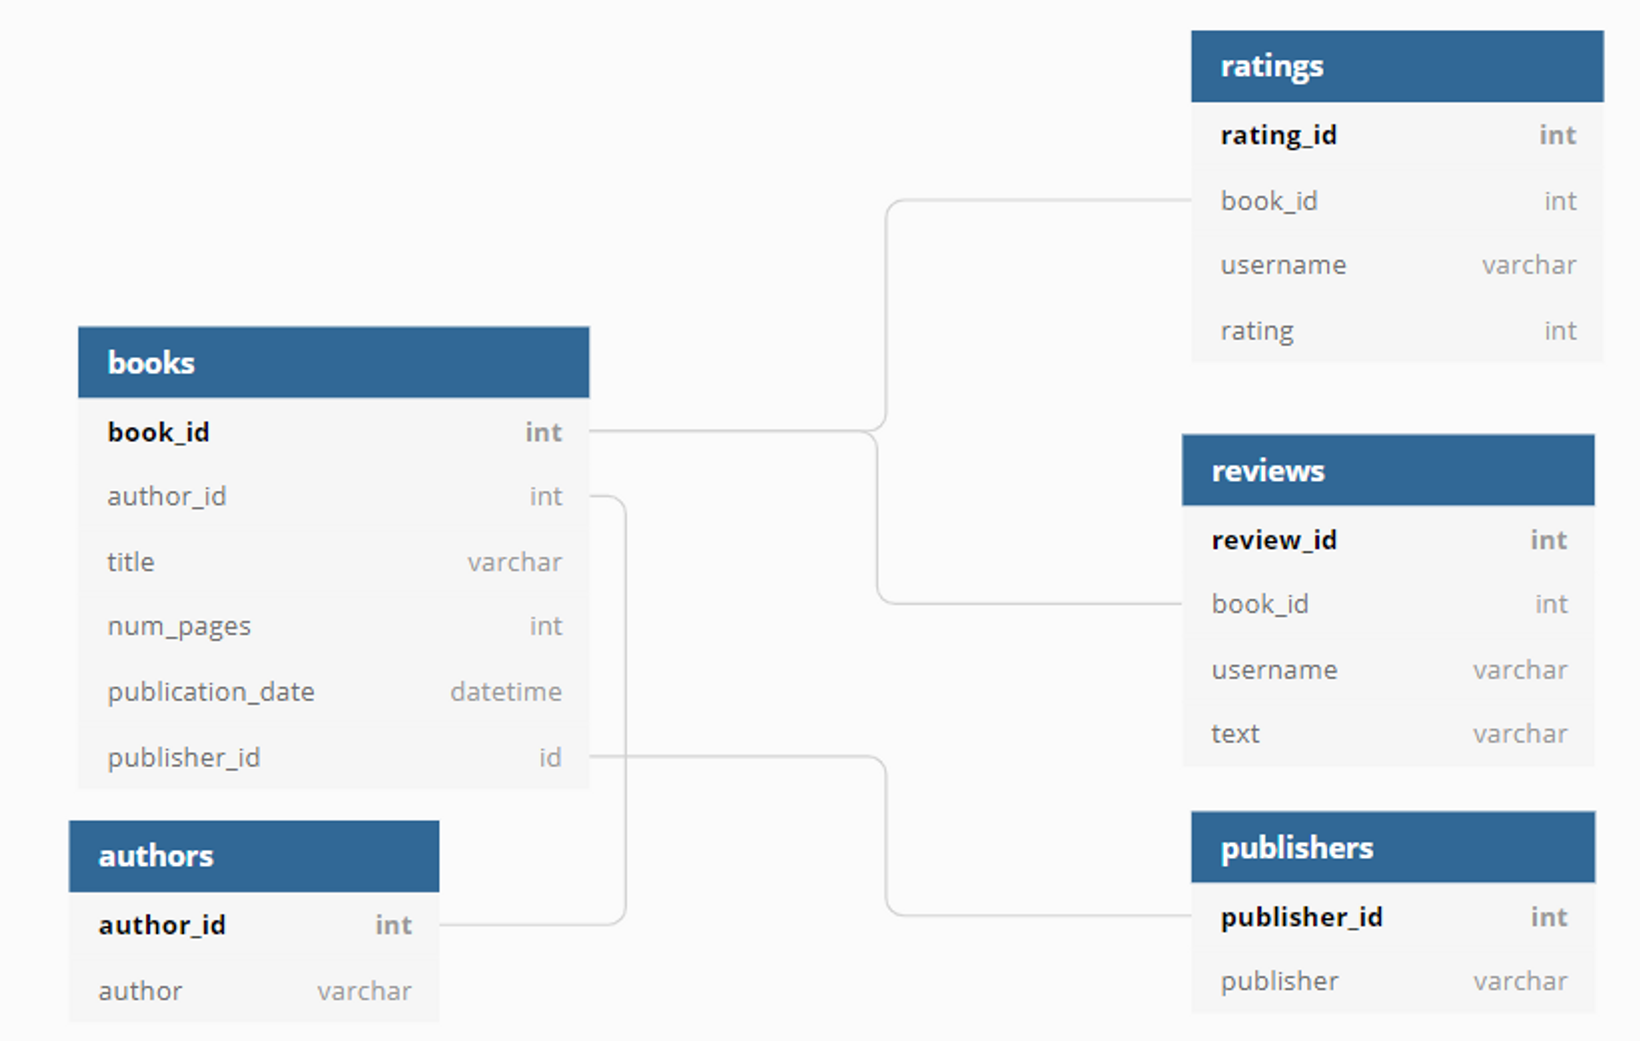

`~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`

## Получим доступ к базе данных

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# устанавливаем параметры
db_config = {'user': '...*', # имя пользователя
'pwd': '...*', # пароль
'host': '...*',
'port': ...*, # порт подключения
'db': '...*'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# * - скрыто в целях конфиденциальности

## Изучим данные

In [10]:
query = '''SELECT *
           FROM books
           LIMIT 5;'''


pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [11]:
query = '''SELECT *
           FROM authors
           LIMIT 5;'''


pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [12]:
query = '''SELECT *
           FROM ratings
           LIMIT 5;'''


pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [13]:
query = '''SELECT *
           FROM reviews
           LIMIT 5;'''


pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [14]:
query = '''SELECT *
           FROM publishers
           LIMIT 5;'''


pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


## Задание 1. Посчитайте, сколько книг вышло после 1 января 2000 года

In [15]:
query = '''SELECT COUNT(book_id)
           FROM books
           WHERE publication_date > '2000-01-01';'''


pd.io.sql.read_sql(query, con = engine)

,count
0,819


**После 1 января 2000 года вышло 819 книг**

## Задание 2. Для каждой книги посчитайте количество обзоров и среднюю оценку

In [26]:
query = '''SELECT b.book_id,
               b.title, 
               COUNT(DISTINCT rw.review_id) AS count_review,  
               ROUND(AVG(rt.rating), 1) AS avg_ratings         
           FROM books AS b
           LEFT JOIN ratings AS rt ON rt.book_id = b.book_id 
           LEFT JOIN reviews AS rw ON rw.book_id = b.book_id 
           GROUP BY b.book_id
           ORDER BY count_review DESC, avg_ratings DESC
           LIMIT 5;'''


pd.io.sql.read_sql(query, con = engine)

,book_id,title,count_review,avg_ratings
0,948,Twilight (Twilight #1),7,3.7
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.4
2,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.3
3,656,The Book Thief,6,4.3
4,734,The Glass Castle,6,4.2


Я сразу отсортировал данные по количеству обзоров и средней оценке.
- Первое место у нас занимает книга Twilight (Twilight #1), я так понимаю это книга "Сумерки" первая серия. На нее написало обзор 7 человек, и ее средняя оценка составляет 3.7;
- Следующие две позиции занимает серия книг "Гарри Поттер и Узник Аскабана" и "Гарри Поттер и тайная комната", со средней оценкой 4.4 и 4.3, количество обзоров на них одинаковр - 6;

## Задание 3. Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;


In [28]:
query = '''SELECT p.publisher,
               COUNT(b.book_id) AS count_books
           FROM publishers AS p
           LEFT JOIN books AS b ON p.publisher_id = b.publisher_id
           WHERE num_pages > 50
           GROUP BY p.publisher
           ORDER BY count_books DESC
           LIMIT 10;'''


pd.io.sql.read_sql(query, con = engine)

,publisher,count_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,St. Martin's Press,14
8,Berkley Books,14
9,William Morrow Paperbacks,13


- Первое место по количеству книг у которых больше 50 страниц у нас занимает издательство - Penguin Books (42 книги);
- Далее идет издательство Vintage (31 книга);
- Третье место занимает издательство Grand Central Publishing (25 книг)

## Задание 4. Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [30]:
query = '''SELECT author,
                  ROUND(AVG(second.rating), 1) AS avg_rating
           FROM (
                SELECT author,
                       AVG(rating) AS rating
                FROM (
                      SELECT *
                      FROM books
                      WHERE book_id IN (SELECT book_id  
                                        FROM ratings
                                        GROUP BY book_id
                                        HAVING COUNT(rating) >= 50)) AS first
                                         
            INNER JOIN authors AS a ON first.author_id = a.author_id
            INNER JOIN ratings AS rat ON first.book_id = rat.book_id
            GROUP BY author
            ORDER BY author) AS second
                
            GROUP BY author
            ORDER BY avg_rating DESC
            LIMIT 1;'''
        
pd.io.sql.read_sql(query, con = engine)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.3


- Автор с само1 выскокой оценкой книг (4.3) - J.K. Rowling/Mary GrandPré. J.K. Rowling - Джоан Роулинг, Британская писательница, Mary GrandPré - Американский иллюстратор. 

## задание 5. Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [31]:
query =  '''
            SELECT ROUND (AVG(second.count_reviewer)) AS avg_reviews
            FROM ( 
                    SELECT COUNT(review_id) AS count_reviewer
                    FROM (
                          SELECT r.username
                          FROM ratings AS r
                          GROUP BY r.username
                          HAVING COUNT(rating_id) > 50
                         ) AS first
            
            LEFT JOIN reviews AS rev ON first.username = rev.username
            GROUP BY rev.username) AS second;'''

pd.io.sql.read_sql(query, con = engine)

,avg_reviews
0,24.0


- Среднее количество обзоров пользователей, которые поставили больше 50 оценок - 24.

## Вывод:

**По результатам анализа базы данных, мы смогли оветить на все наши вопросы и получили следующие ответы:**
- После 1 января 2000 года было выпущено всего `819` книг;
- `Топ-3` книг по количеству обзоров и среднец оценке:
    - Twilight (Twilight #1), 7 обзоров, 3.7 средняя оценка;
    - Harry Potter and the Prisoner of Azkaban, `6` обзоров, средняя оценка `4.4`;
    - Harry Potter and the Chamber of Secrets, `6` обзоров, средняя оценка `4.3`.
- `Топ-3` издательств по количеству книг толще 50 страниц:
    - Penguin Books, количество книг - `42`;
    - Vintage, количество книг - `31`;
    - Grand Central Publishing, количество книг - `25`.
- Автор с самой высокой средней оценкой книг (толще 50 страниц): `J.K. Rowling/Mary GrandPré`. J.K. Rowling - Джоан Роулинг, Британская писательница, Mary GrandPré - Американский иллюстратор.
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - `24`